### What is the sentiment of this film review?

In [1]:
!pip install ecco
import ecco

lm = ecco.from_pretrained('t5-small')
review="""Denis Villeneuve's Dune looks and sounds amazing -- and once the 
(admittedly slow-building) story gets you hooked, you'll be on the edge 
of your seat for the sequel."""

output = lm.generate(f"sst2 sentence: {review}", generate=1, do_sample=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Use a large language model (T5 in this case) to detect text sentiment. In addition to the sentiment, see the tokens the model broke the text into (which can help debug some edge cases).

### Which words in this review lead the model to classify its sentiment as "negative"?

In [2]:
import ecco
lm = ecco.from_pretrained('t5-small', verbose=False)
review="""I have a well-documented weakness for sci-fi and expected Dune 
to feed my soul. I didn't expect it to entirely blow my mind."""

output = lm.generate(f"sst2 sentence: {review}", generate=1, do_sample=False, attribution=['ig'])
output.primary_attributions(attr_method='ig', ignore_tokens=[0,1,2,3,4,5,6,43,44])

<IPython.core.display.Javascript object>


Feature attribution using Integrated Gradients helps you explore model decisions. In this case, switching "weakness" to "inclination" allows the model to correctly switch the prediction to *positive*.

### Explore the world knowledge of GPT models by posing fill-in-the blank questions.

In [1]:
import ecco
lm = ecco.from_pretrained('gpt2')
prompt=""" Heathrow airport is located in the city of"""

output = lm.generate(prompt, generate=1, do_sample=False)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>


Does GPT2 know where Heathrow Airport is? Yes. It does.

### What other cities/words did the model consider in addition to London?

In [2]:
import ecco
#lm = ecco.from_pretrained('gpt2', verbose=False)
prompt=""" Heathrow airport is located in the city of"""

output = lm.generate(prompt, generate=1, do_sample=False, attribution=['ig'])
output.primary_attributions(attr_method='ig')

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Visuals the candidate output tokens and their probability scores.

### Which input words lead it to think of London?

In [5]:
output.layer_predictions(position=9, layer=11)

<IPython.core.display.Javascript object>


### At which layers did the model gather confidence that London is the right answer?

C:\Users\erikm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ecco\output.py:469: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_id = torch.tensor(self.token_ids[0][offset + j])


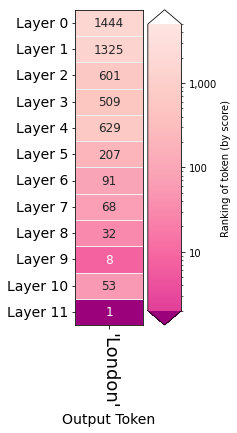

In [3]:
output.rankings()


The model chose London by making the highest probability token (ranking it #1) after the last layer in the model. How much did each layer contribute to increasing the ranking of *London*? This is a [logit lens](https://www.lesswrong.com/posts/AcKRB8wDpdaN6v6ru/interpreting-gpt-the-logit-lens) visualizations that helps explore the activity of different model layers.

### What are the patterns in BERT neuron activation when it processes a piece of text? 

In [6]:
import ecco
lm = ecco.from_pretrained('distilbert-base-uncased', activations=True)
#lm = ecco.from_pretrained('gpt2', activations=True)
text = ''' Now I ask you: \n what can be expected of man since he is a being endowed with strange qualities? Shower upon him every earthly blessing, drown him in a sea of happiness, so that nothing but bubbles of bliss can be seen on the surface; give him economic prosperity, such that he should have nothing else to do but sleep, eat cakes and busy himself with the continuation of his species, and even then out of sheer ingratitude, sheer spite, man would play you some nasty trick. He would even risk his cakes and would deliberately desire the most fatal rubbish, the most uneconomical absurdity, simply to introduce into all this positive good sense his fatal fantastic element. It is just his fantastic dreams, his vulgar folly that he will desire to retain, simply in order to prove to himself--as though that were so necessary-- that men still are men and not the keys of a piano, which the laws of nature threaten to control so completely that soon one will be able to desire nothing but by the calendar. And that is not all: even if man really were nothing but a piano-key, even if this were proved to him by natural science and mathematics, even then he would not become reasonable, but would purposely do something perverse out of simple ingratitude, simply to gain his point. And if he does not find means he will contrive destruction and chaos, will contrive sufferings of all sorts, only to gain his point! He will launch a curse upon the world, and as only man can curse (it is his privilege, the primary distinction between him and other animals), may be by his curse alone he will attain his object--that is, convince himself that he is a man and not a piano-key!
'''
inputs = lm.tokenizer([text], return_tensors="pt")
output = lm(inputs)
nmf_1 = output.run_nmf(n_components=8) 
nmf_1.explore()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<IPython.core.display.Javascript object>

In [7]:
import ecco
#lm = ecco.from_pretrained('distilbert-base-uncased', activations=True)
lm = ecco.from_pretrained('gpt2-base-uncased', activations=True)
text = ''' Now I ask you: \n what can be expected of man since he is a being endowed with strange qualities? Shower upon him every earthly blessing, drown him in a sea of happiness, so that nothing but bubbles of bliss can be seen on the surface; give him economic prosperity, such that he should have nothing else to do but sleep, eat cakes and busy himself with the continuation of his species, and even then out of sheer ingratitude, sheer spite, man would play you some nasty trick. He would even risk his cakes and would deliberately desire the most fatal rubbish, the most uneconomical absurdity, simply to introduce into all this positive good sense his fatal fantastic element. It is just his fantastic dreams, his vulgar folly that he will desire to retain, simply in order to prove to himself--as though that were so necessary-- that men still are men and not the keys of a piano, which the laws of nature threaten to control so completely that soon one will be able to desire nothing but by the calendar. And that is not all: even if man really were nothing but a piano-key, even if this were proved to him by natural science and mathematics, even then he would not become reasonable, but would purposely do something perverse out of simple ingratitude, simply to gain his point. And if he does not find means he will contrive destruction and chaos, will contrive sufferings of all sorts, only to gain his point! He will launch a curse upon the world, and as only man can curse (it is his privilege, the primary distinction between him and other animals), may be by his curse alone he will attain his object--that is, convince himself that he is a man and not a piano-key!
'''
inputs = lm.tokenizer([text], return_tensors="pt")
output = lm(inputs)
nmf_1 = output.run_nmf(n_components=8) 
nmf_1.explore()

ValueError: ("The model 'gpt2-base-uncased' is not defined in Ecco's 'model-config.yaml' file and so is not explicitly supported yet. Supported models are:", ['gpt2', 'gpt2-medium', 'gpt2-xl', 'distilgpt2', 'distilbert-base-uncased', 'bert-base-uncased', 'bert-large-uncased', 'distilbert-base-uncased-finetuned-sst-2-english', 'microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract', 'albert-base-v2', 'albert-large-v2', 'albert-xxlarge-v2', 'distilroberta-base', 'roberta-base', 'roberta-large', 'google/electra-small-discriminator', 'google/electra-base-discriminator', 'sentence-transformers/distilbert-base-nli-stsb-mean-tokens', 't5-small', 't5-base', 'bigscience/T0_3B', 'bigscience/T0', 'bigscience/T0p', 'bigscience/T0pp', 'tscholak/1wnr382e', 'valhalla/t5-small-qg-hl', 'valhalla/t5-small-qa-qg-hl', 'valhalla/t5-base-e2e-qg', 'facebook/bart-large-mnli', 'sshleifer/tiny-gpt2', 'julien-c/bert-xsmall-dummy', 'EleutherAI/gpt-neo-125M', 'EleutherAI/gpt-neo-1.3B', 'EleutherAI/gpt-neo-2.7B'])